In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit #
from sklearn.model_selection import KFold, StratifiedKFold #
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# General Sense of Data

Data was obtain from:
https://www.kaggle.com/c/3d-credit-card-fraud-detection/data?select=sample_submission.csv

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(170884, 31)

In [6]:
# columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# missing values in dataframe
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [8]:
nonfraud = round(df.Class.value_counts()[0] / len(df.Class) * 100, 2)
fraud = round(df.Class.value_counts()[1] / len(df.Class) * 100, 2)

print("Fraud: {}".format(fraud))
print("Non-Fruad: {}".format(nonfraud))

Fraud: 0.21
Non-Fruad: 99.79


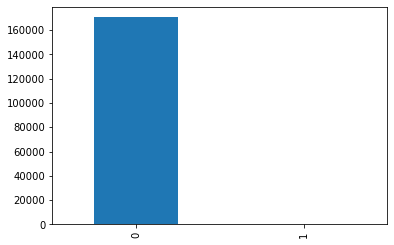

In [9]:
# Bar graph of number of Fraud Vs Non-Fraud
df.Class.value_counts().plot.bar()
plt.show()

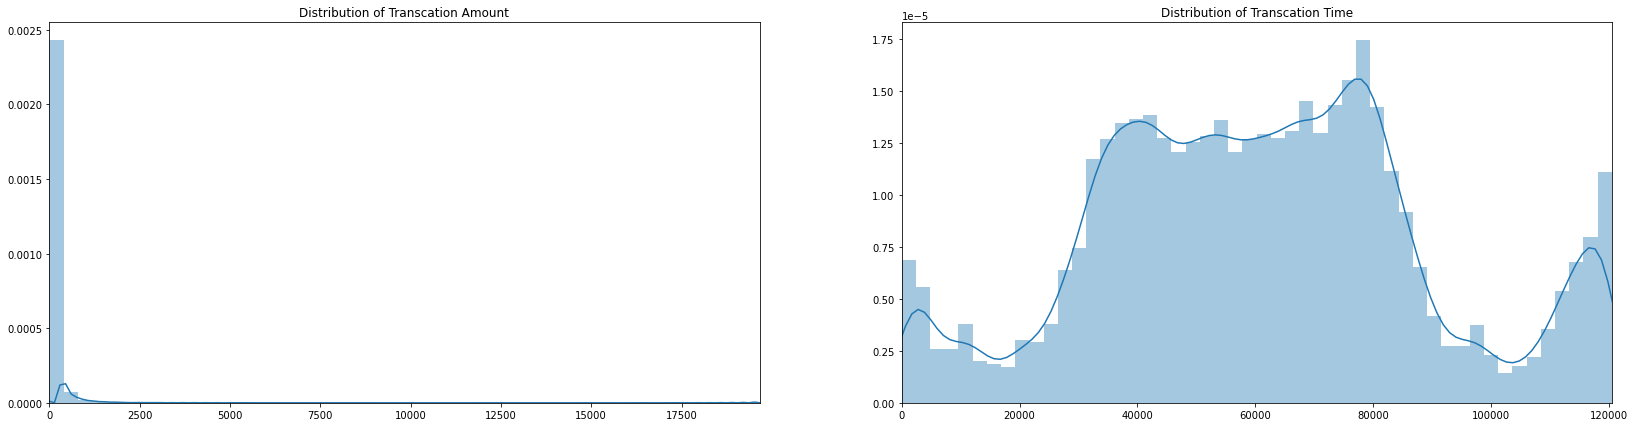

In [10]:
# distribution for Amount and Time
fig, ax = plt.subplots(1, 2, figsize = (28, 7))

amount_value = df.Amount.values
time_value = df.Time.values

sns.distplot(amount_value, ax = ax[0])
ax[0].set_title('Distribution of Transcation Amount')
ax[0].set_xlim([min(amount_value), max(amount_value)])

sns.distplot(time_value, ax = ax[1])
ax[1].set_title('Distribution of Transcation Time')
ax[1].set_xlim([min(time_value), max(time_value)])

plt.show()

In [11]:
# Summary Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,61091.914135,-0.169851,0.040763,0.493029,0.117427,-0.176094,0.058223,-0.080665,0.032226,0.018873,...,-0.028287,-0.083743,-0.022458,0.009009,0.092274,0.012610,0.002094,0.002441,87.336924,0.002107
std,27828.397787,1.850532,1.610872,1.383240,1.371906,1.338609,1.295129,1.208515,1.227626,1.152294,...,0.743711,0.667316,0.584514,0.598759,0.465509,0.490669,0.391950,0.307318,245.953726,0.045850
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41216.750000,-0.986673,-0.539184,-0.064753,-0.743475,-0.828768,-0.691133,-0.586311,-0.162641,-0.660093,...,-0.230720,-0.546776,-0.170297,-0.332459,-0.195931,-0.330344,-0.065125,-0.027055,5.480000,0.000000
50%,60776.000000,-0.183596,0.109673,0.623352,0.124296,-0.226226,-0.202635,-0.031930,0.056663,-0.078965,...,-0.054463,-0.066777,-0.036213,0.059475,0.135677,-0.058965,0.008693,0.021151,21.895000,0.000000
75%,78622.000000,1.184446,0.804219,1.297351,0.937625,0.374478,0.449191,0.462623,0.350995,0.641351,...,0.128337,0.363159,0.098704,0.415858,0.399458,0.272944,0.089725,0.078301,76.722500,0.000000
max,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


# Summary

Due to privacy reasons, the only known features are Amount and Class. Freatures with the prefix "V" are principal components obtain with PCA. Additionally, Amount and Class has not been transform.

Keypoints:

    - The average amount spent per transcation is about $87.33 USD
    - There are no null values
    - Dataset is large imbalance with 0.21% Fraud and 99.79% Non-Fraud

# Scaling 'Amount' & 'Time'

In [12]:
# Scaling with standardizzation

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['S_Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['S_Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

Why are we scaling Amount & Time?

By using standardization, we assume that the data has a Gaussian distribution, however, it doesn't have to be strictly true. It is just more effective if it has a Gaussian distribution. It is useful given our majority of features have been scaled. Furthermore, it is useful if we plan on using an algorithm that assumes our dataset has a Gaussian disbtrution. In this case we will be using Logistic Regression. Furthermore, we are standardizing by using the Z-Score which means that the mean of 0 and the standard deviation of 1. 

# Setting up the Reporting Results

In [13]:
def train_set(ytrain,train_pred):
    print("confusion matrix for train set : ")
    cm = confusion_matrix(ytrain,train_pred)
    print(cm)
    print("--"*40)
    print("False positive rate :",(cm[1][0]/(cm[1][0]+cm[1][1]))*100)  # FPR = FP/FP +TN
    print("\n")
    print(cm[1][0] ,"out of",(cm[1][0]+cm[1][1]),"fraud transaction instances were classified as not a fraudulent transactions \n")
    print("--"*40)
    print("False Negative rate :",(cm[0][1]/(cm[0][1]+cm[0][0]))*100) # FNR = FN + (FN + TP )
    print("\n")
    print(cm[0][1],"out of ",(cm[0][1]+cm[0][0]),"non fraudulent transaction instances were classified as  a fraudulent transactions")
    print("--"*40)
    print(classification_report(ytrain,train_pred))

In [22]:
def show_metrics(title, accuracy, precision, recall, f1, auc):
    print(title, 'Results:\n')
    print('Accuracy: {}'.format(round(np.mean(accuracy), 2)))
    print('Precision: {}'.format(round(np.mean(precision), 2)))
    print('Recall: {}'.format(round(np.mean(recall), 2)))
    print('F1-Score: {}'.format(round(np.mean(f1), 2)))
    print('AUC: {}'.format(round(np.mean(auc), 2)))
    print()
    print('*'*80)
    print()

# Cross Validation -> Random Undersample

Sampling before cross validation can lead to data leakage - duplicating observations that will end up in both the training and testing dataset. Thus, this can lead to overfitting. Data sampling should always be done during the splitting of data and/ or cross validation.

I will also perform random undersampling which will remove data that has been classified as non-fraud in order to create a more balance dataset. Eventually the dataset will be balance with 50 percent of the observation being classified as fraud and non-fraud. This process will help avoid overfitting issues, however, this does come with the issue of loss in accuracy due to information loss. 

In [14]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [15]:
nm_accuracy = []
nm_precision = []
nm_recall = []
nm_f1 = []
nm_auc = []

nm_cmatrix = []

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [17]:
# Splits our data uniformly for each split

cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [20]:
for train_index, test_index in cv.split(X_train, y_train):
    
    pipeline = imbalanced_make_pipeline(NearMiss(), LogisticRegression())
    nm_cv_model = pipeline.fit(X_train[train_index], y_train[train_index])
    nm_cv_predict = nm_cv_model.predict(X_train[test_index])
    
    # Scoring metrics
    nm_accuracy.append(pipeline.score(X_train[test_index], y_train[test_index]))
    nm_precision.append(precision_score(y_train[test_index], nm_cv_predict))
    nm_recall.append(recall_score(y_train[test_index], nm_cv_predict))
    nm_f1.append(f1_score(y_train[test_index], nm_cv_predict))
    nm_auc.append(roc_auc_score(y_train[test_index], nm_cv_predict))
    
    # Confusion Matrices
    nm_cmatrix.append(confusion_matrix(y_train[test_index], nm_cv_predict))

In [23]:
show_metrics('NearMiss During Cross Validation', nm_accuracy, nm_precision, nm_recall, nm_f1, nm_auc)

NearMiss During Cross Validation Results:

Accuracy: 0.55
Precision: 0.0
Recall: 0.96
F1-Score: 0.01
AUC: 0.75

********************************************************************************



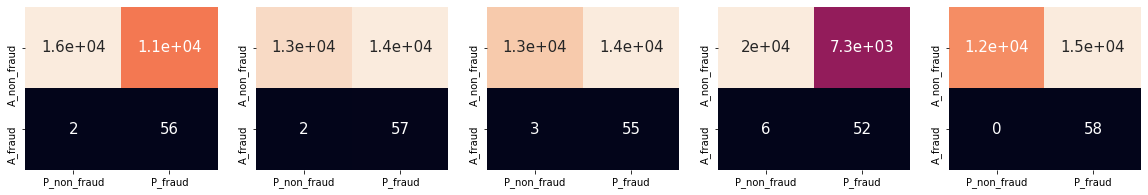

In [34]:
fig, ax = plt.subplots(figsize = (20, 3), nrows = 1, ncols = 5)
xtick_labels = ['P_non_fraud', 'P_fraud']
ytick_labels = ['A_non_fraud', 'A_fraud']
k = 0

for cmatrix in nm_cmatrix:
    ax1 = sns.heatmap(cmatrix, cbar=False, ax=ax[k], yticklabels=ytick_labels,
                      xticklabels=xtick_labels, annot=True, annot_kws={'size' : 15})
    k=k+1

In [25]:
nm_cmatrix[:5]

[array([[15909, 11375],
        [    2,    56]], dtype=int64),
 array([[13329, 13954],
        [    2,    57]], dtype=int64),
 array([[13016, 14267],
        [    3,    55]], dtype=int64),
 array([[19935,  7348],
        [    6,    52]], dtype=int64),
 array([[11807, 15476],
        [    0,    58]], dtype=int64)]

# Cross Validation -> Random Oversampling

Now instead of random undersampling, I will use random over sampling. I will use synthetic minority oversampling technique (SMOTE). It is another method to dealing with imblanced data. This method create new minority instances from existing minority instances. 

"The new instances are not just copies of existing minority cases; instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general." 

https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote

In [35]:
sm_accuracy = []
sm_precision = []
sm_recall = []
sm_f1 = []
sm_auc = []

sm_cmatrix = []

In [36]:
for train_index, test_index in cv.split(X_train, y_train):
    
    pipeline = imbalanced_make_pipeline(SMOTE(), LogisticRegression())
    nm_cv_model = pipeline.fit(X_train[train_index], y_train[train_index])
    nm_cv_predict = nm_cv_model.predict(X_train[test_index])
    
    # Scoring metrics
    sm_accuracy.append(pipeline.score(X_train[test_index], y_train[test_index]))
    sm_precision.append(precision_score(y_train[test_index], nm_cv_predict))
    sm_recall.append(recall_score(y_train[test_index], nm_cv_predict))
    sm_f1.append(f1_score(y_train[test_index], nm_cv_predict))
    sm_auc.append(roc_auc_score(y_train[test_index], nm_cv_predict))
    
    # Confusion Matrices
    sm_cmatrix.append(confusion_matrix(y_train[test_index], nm_cv_predict))

In [37]:
show_metrics('SMOTE During Cross Validation', sm_accuracy, sm_precision, sm_recall, sm_f1, nm_auc)

SMOTE During Cross Validation Results:

Accuracy: 0.98
Precision: 0.08
Recall: 0.91
F1-Score: 0.15
AUC: 0.75

********************************************************************************



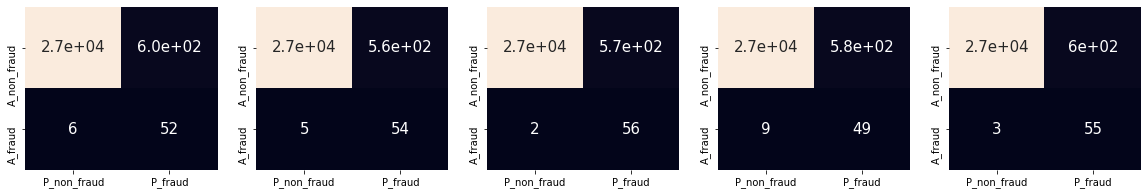

In [38]:
fig, ax = plt.subplots(figsize = (20, 3), nrows = 1, ncols = 5)
xtick_labels = ['P_non_fraud', 'P_fraud']
ytick_labels = ['A_non_fraud', 'A_fraud']
k = 0

for cmatrix in sm_cmatrix:
    ax1 = sns.heatmap(cmatrix, cbar=False, ax=ax[k], yticklabels=ytick_labels,
                      xticklabels=xtick_labels, annot=True, annot_kws={'size' : 15})
    k=k+1

In [39]:
sm_cmatrix

[array([[26679,   605],
        [    6,    52]], dtype=int64),
 array([[26720,   563],
        [    5,    54]], dtype=int64),
 array([[26717,   566],
        [    2,    56]], dtype=int64),
 array([[26708,   575],
        [    9,    49]], dtype=int64),
 array([[26684,   599],
        [    3,    55]], dtype=int64)]

# Continue Modeling with SMOTE

In [52]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train) 

In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 291
Before OverSampling, counts of label '0': 136416


In [54]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(X_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, the shape of train_X: (272832, 30)
After OverSampling, the shape of train_y: (272832, 30) 

After OverSampling, counts of label '1': 136416
After OverSampling, counts of label '0': 136416


# Selecting Hyperparamter

In [108]:
from sklearn.model_selection import GridSearchCV

params = {"penalty":['l1', 'l2', 'none'], "C": [0.001, 0.01, 0.1, 1, 10, 15, 20]}
grid_lr = GridSearchCV(LogisticRegression(), params,
                      scoring = 'recall',
                      cv = 10,
                      n_jobs = - 1)

grid_lr.fit(X_train_sm, y_train_sm)
log_reg = grid_lr.best_estimator_

In [109]:
log_reg

LogisticRegression(C=0.001, penalty='none')

# Final Model

In [110]:
lr = LogisticRegression(C=0.001, penalty='none')
lr.fit(X_train_sm, y_train_sm) 
predictions = lr.predict(X_test) 

print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34108
           1       0.08      0.90      0.14        69

    accuracy                           0.98     34177
   macro avg       0.54      0.94      0.57     34177
weighted avg       1.00      0.98      0.99     34177



# Testing on Kaggle Test Data

In [101]:
test_df = pd.read_csv('test.csv')

In [102]:
test_df['S_Amount'] = std_scaler.fit_transform(test_df['Amount'].values.reshape(-1,1))
test_df['S_Time'] = std_scaler.fit_transform(test_df['Time'].values.reshape(-1,1))

test_df.drop(['Amount', 'Time'], axis = 1, inplace = True)

In [111]:
predict_kaggle = lr.predict(test_df)

In [112]:
kaggle_df = pd.DataFrame(predict_kaggle)
kaggle_df.rename(columns = {0: 'Class'}, inplace = True)

In [113]:
sample = pd.read_csv("sample_submission.csv")
sample.drop(['Class'], axis = 1, inplace = True)

In [114]:
sample['Class'] = kaggle_df.Class
sample.set_index(['Id'], inplace = True)

In [115]:
sample.to_csv('kaggle_credit.csv')

# Results

This is a late submission for https://www.kaggle.com/c/3d-credit-card-fraud-detection/leaderboard.

The results from the models:

    - Private Score: 0.95010
    - Public Score: 0.90332
    
Public score is determine by 30% of test data while private score determine by 70% of the test data.

In [123]:
# Final Score

print("Final Score: {}".format(.3 * (0.90332) + .7 * (0.95010)))

Final Score: 0.936066
